In [2]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam 
#from keras.utils.np_utils import to_categorical

from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.utils import to_categorical

2023-09-26 15:15:40.065259: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-26 15:15:43.309863: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-26 15:15:43.310720: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 15:15:49.585390: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:

df[["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "winddir", "conditions"]]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,conditions
0,29.0,21.7,26.2,31.7,21.7,27.4,20.6,72.0,22.1,47.0,Partially cloudy
1,29.0,23.0,26.5,35.4,23.0,27.6,20.8,71.5,25.7,56.8,"Rain, Partially cloudy"
2,29.9,24.2,26.6,32.0,24.2,27.5,20.8,71.0,23.9,46.3,"Rain, Partially cloudy"
3,31.0,23.5,27.1,34.5,23.5,28.9,22.7,77.8,23.8,61.9,"Rain, Partially cloudy"
4,32.5,23.8,28.0,36.7,23.8,30.6,23.7,78.8,21.9,54.4,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...
2033,30.8,25.7,27.8,38.8,25.7,32.4,25.4,86.5,16.7,233.0,"Rain, Overcast"
2034,29.9,24.2,26.9,37.3,24.2,29.6,24.9,89.5,14.6,228.3,"Rain, Overcast"
2035,29.4,21.9,25.7,36.3,21.9,26.9,25.0,94.9,11.2,265.7,"Rain, Overcast"
2036,28.0,24.9,26.6,34.5,24.9,29.0,25.1,92.0,19.3,254.2,"Rain, Overcast"


In [4]:
csv_filename = "qc aggregated data.csv"
df = pd.read_csv(csv_filename)

X = df[["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "winddir"]]
y = df["conditions"]
X = np.array(X)
y = np.array(y)

le = LabelEncoder()
le.fit(y)
y = le.transform(y)
#y = to_categorical(y)
num_classes = len(le.classes_)

_ = 0
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2)
print(f"Initial Split: t: {len(np.unique(y_t))} test: {len(np.unique(y_test))} x: {num_classes}")
while (len(np.unique(y_test)) != num_classes) or (len(np.unique(y_t)) != num_classes):
    X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2)
    _ += 1
    print(f" {_} Loop Split: t: {len(np.unique(y_t))} test: {len(np.unique(y_test))} x: {num_classes}")

print("Initial Split Done")

X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2)
print(f"Train Valid Split: train: {len(np.unique(y_train))} test: {len(np.unique(y_valid))} x: {num_classes}")
_ = 0
while (len(np.unique(y_train)) != num_classes) or (len(np.unique(y_valid)) != num_classes):
    X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2)
    print(f"{_} Loop Train Split: train: {len(np.unique(y_train))} test: {len(np.unique(y_valid))} x: {num_classes}")

print("Loop Split Done")
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)
y_train = to_categorical(y_train)

Initial Split: t: 4 test: 4 x: 4
Initial Split Done
Train Valid Split: train: 4 test: 4 x: 4
Loop Split Done


# Neural Network

# Neural Network

Epoch 1/1000
27/27 - 1s - loss: 1.3215 - accuracy: 0.5502 - val_loss: 0.8870 - val_accuracy: 0.6571 - 1s/epoch - 51ms/step
Epoch 2/1000
27/27 - 0s - loss: 0.8995 - accuracy: 0.6352 - val_loss: 0.7805 - val_accuracy: 0.6667 - 44ms/epoch - 2ms/step
Epoch 3/1000
27/27 - 0s - loss: 0.7956 - accuracy: 0.6567 - val_loss: 0.9150 - val_accuracy: 0.5476 - 51ms/epoch - 2ms/step
Epoch 4/1000
27/27 - 0s - loss: 0.9545 - accuracy: 0.6746 - val_loss: 0.7871 - val_accuracy: 0.5952 - 45ms/epoch - 2ms/step
Epoch 5/1000
27/27 - 0s - loss: 0.7665 - accuracy: 0.6663 - val_loss: 0.5799 - val_accuracy: 0.7286 - 45ms/epoch - 2ms/step
Epoch 6/1000
27/27 - 0s - loss: 0.6192 - accuracy: 0.7153 - val_loss: 0.9421 - val_accuracy: 0.6286 - 45ms/epoch - 2ms/step
Epoch 7/1000
27/27 - 0s - loss: 0.7585 - accuracy: 0.6591 - val_loss: 0.6431 - val_accuracy: 0.7190 - 47ms/epoch - 2ms/step
Epoch 8/1000
27/27 - 0s - loss: 0.6010 - accuracy: 0.7165 - val_loss: 0.6292 - val_accuracy: 0.7238 - 52ms/epoch - 2ms/step
Epoch 9/1

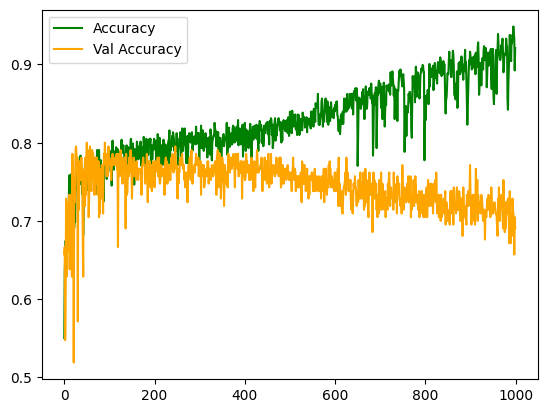

In [5]:
model = Sequential([
    layers.InputLayer(10, ),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"])

history = model.fit(
    X_train,
    y_train, 
    validation_data = (X_valid, y_valid),
    epochs = 1000,
    verbose = 2
)

plt.plot(history.history["accuracy"], label="Accuracy", color="green")
plt.plot(history.history["val_accuracy"], label="Val Accuracy", color="orange")
plt.legend()
plt.show()

In [6]:
model.evaluate(X_test, y_test), model.metrics_names

27/27 [==============================] - 0s 709us/step


([0.5541232824325562, 0.7843137383460999], ['loss', 'accuracy'])

11/11 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.7546
Test Acc: 0.7843137383460999
Train Acc: 0.7645705342292786
Valid Acc: 0.754601240158081


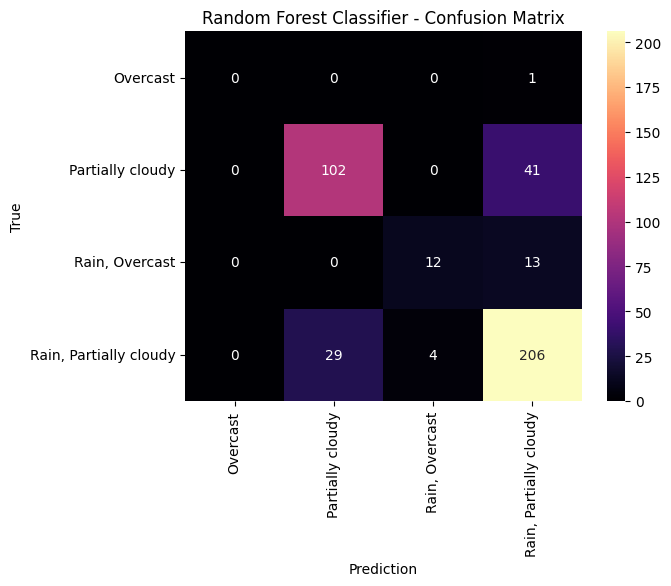

In [174]:
# Predict(1d) Not Predict Probablity of Each Class (2d)
y_preds = np.argmax(model.predict(X_test), axis=1)

# Evaluate (Only accuracy) on test set
accuracy = model.evaluate(X_test, y_test)[1]
accuracy_t = model.evaluate(X_train, y_train)[1]
accuracy_v = model.evaluate(X_valid, y_valid)[1]

print(f"Test Acc: {accuracy}\nTrain Acc: {accuracy_t}\nValid Acc: {accuracy_v}")

# Plot Confusion Matrix using Seaborn + PyPlot
y_test = np.argmax(y_test, axis=1)
CM = confusion_matrix(y_test, y_preds)
ax = plt.subplot()
ax.set_title("Random Forest Classifier - Confusion Matrix")
sn.heatmap(CM, annot=True, cmap="magma", ax=ax, fmt='d')
ax.xaxis.set_ticklabels(lm)
ax.yaxis.set_ticklabels(lm)
plt.xlabel("Prediction")
plt.ylabel("True")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Data Preprocessing for SciKit Learn Models

In [37]:
# Inputs and Outputs from dataset
X = df[["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "winddir"]]
y = df["conditions"]

# Create LabelEncoder -> [0, 1, 2, 3]
le = LabelEncoder()

# Fit and Transform y to fit Label Encoder (since y is originally "classes")
y = le.fit_transform(y)

# Split testing and training set
_ = 0
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2)
print(f"Initial Split: t: {len(np.unique(y_t))} test: {len(np.unique(y_test))} x: {num_classes}")
while (len(np.unique(y_test)) != num_classes) or (len(np.unique(y_t)) != num_classes):
    X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2)
    _ += 1
    print(f" {_} Loop Split: t: {len(np.unique(y_t))} test: {len(np.unique(y_test))} x: {num_classes}")

print("Initial Split Done")

# Create the label mapping for the confusion matrix (used for all matrices onward)
label_mapping = {x : y for x, y in zip(le.transform(le.classes_), le.classes_)}
lm = list(label_mapping.values())

# Random Forest Classifier

Test Acc: 0.7633587786259542
Train Acc: 1.0
Valid Acc: 0.780952380952381


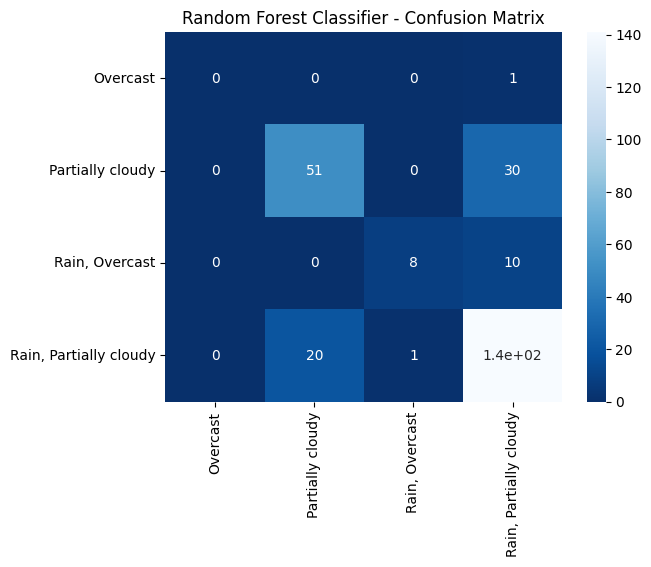

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sn


# Create Classifier
RFC = RandomForestClassifier()

# Fit Data
RFC.fit(X_train, y_train)

# Predict(1d) Not Predict Probablity of Each Class (2d)
y_preds = RFC.predict(X_test)
y_class_preds = RFC.predict_proba(X_test)

# Evaluate (Only accuracy) on test set
accuracy = RFC.score(X_test, y_test)
accuracy_t = RFC.score(X_train, y_train)
accuracy_v = RFC.score(X_valid, y_valid)

print(f"Test Acc: {accuracy}\nTrain Acc: {accuracy_t}\nValid Acc: {accuracy_v}")

# Get Confusion Matrix (Raw)
CM = confusion_matrix(y_test, y_preds)

# Plot Confusion Matrix using Seaborn + PyPlot
ax = plt.subplot()
ax.set_title("Random Forest Classifier - Confusion Matrix")
sn.heatmap(CM, annot=True, cmap="Blues_r", ax=ax)
ax.xaxis.set_ticklabels(lm)
ax.yaxis.set_ticklabels(lm)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Test Acc: 0.75
Train Acc: 0.7875766871165644
Valid Acc: 0.7791411042944786


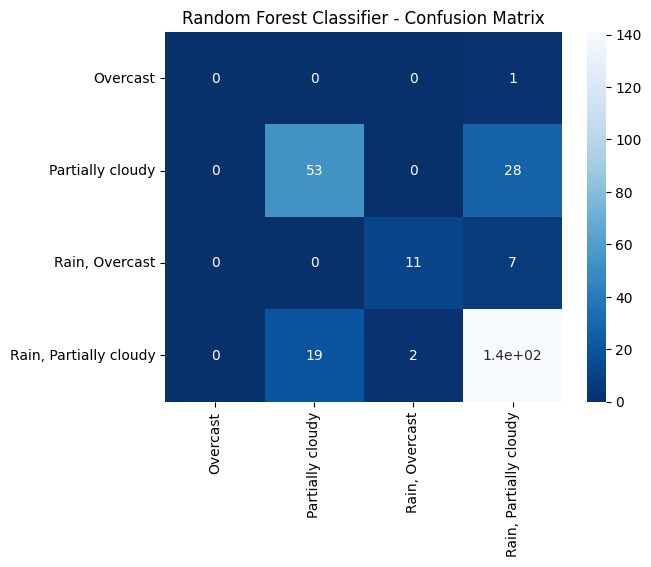

# Logistic Regression Classifier

Test Acc: 0.7442748091603053
Train Acc: 0.7858851674641149
Valid Acc: 0.780952380952381


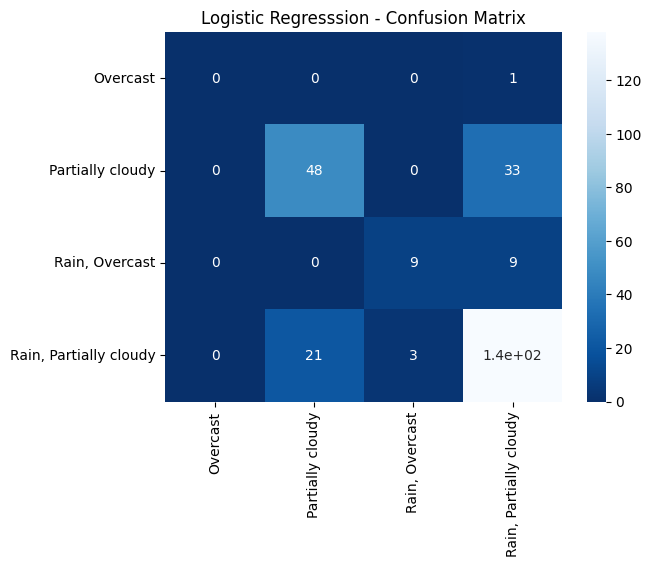

In [32]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression Object
LR = LogisticRegression(solver = "newton-cg", multi_class = "multinomial", max_iter= 500, n_jobs = -1) 

# Fit to Data
LR.fit(X_train, y_train)

# Evaluate (Only accuracy) on test set
accuracy = LR.score(X_test, y_test)
accuracy_t = LR.score(X_train, y_train)
accuracy_v = LR.score(X_valid, y_valid)

print(f"Test Acc: {accuracy}\nTrain Acc: {accuracy_t}\nValid Acc: {accuracy_v}")

# Predict using model
y_preds = LR.predict(X_test)


#Confusion Matrix for Logistic Regression
CM = confusion_matrix(y_test, y_preds)
ax = plt.subplot()
ax.set_title("Logistic Regresssion - Confusion Matrix")
sn.heatmap(CM, annot=True, cmap="Blues_r", ax=ax)
ax.xaxis.set_ticklabels(lm)
ax.yaxis.set_ticklabels(lm)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# K - Nearest Neighbors

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Test Acc: 0.6183206106870229
Train Acc: 0.6160287081339713
Valid Acc: 0.6238095238095238


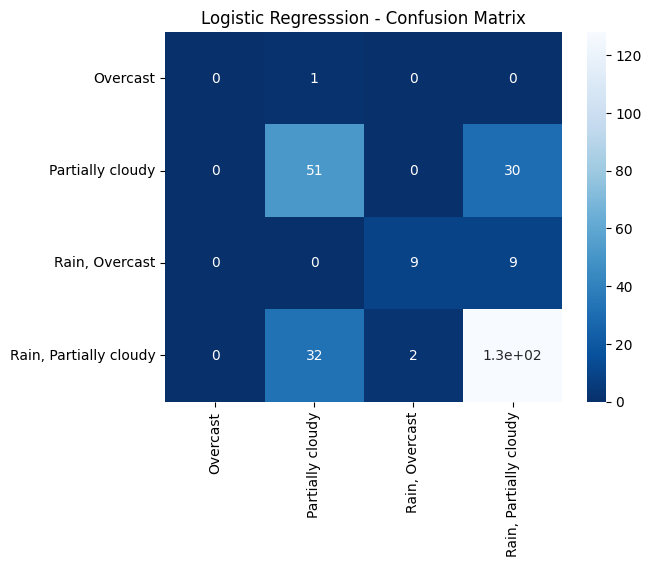

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Standard Scaler for KNN
SS = StandardScaler()

# Standard Scaled Train Set
X_train_SS = SS.fit_transform(X_train)

# Standard Scaled Test Set
X_test_SS = SS.transform(X_test)

# KNN Object
KNN = KNeighborsClassifier()

# Fit Data
KNN.fit(X_train_SS, y_train)

# Evaluate (Only accuracy) on test set
accuracy = KNN.score(X_test, y_test)
accuracy_t = KNN.score(X_train, y_train)
accuracy_v = KNN.score(X_valid, y_valid)

print(f"Test Acc: {accuracy}\nTrain Acc: {accuracy_t}\nValid Acc: {accuracy_v}")

# Predict Using Model
y_preds = KNN.predict(X_test_SS)

CM = confusion_matrix(y_test, y_preds)
ax = plt.subplot()
ax.set_title("Logistic Regresssion - Confusion Matrix")
sn.heatmap(CM, annot=True, cmap="Blues_r", ax=ax)
ax.xaxis.set_ticklabels(lm)
ax.yaxis.set_ticklabels(lm)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


# K - Nearest Neighbors (With no Scaling)

Test Acc: 0.7175572519083969
Train Acc: 0.8241626794258373
Valid Acc: 0.7380952380952381


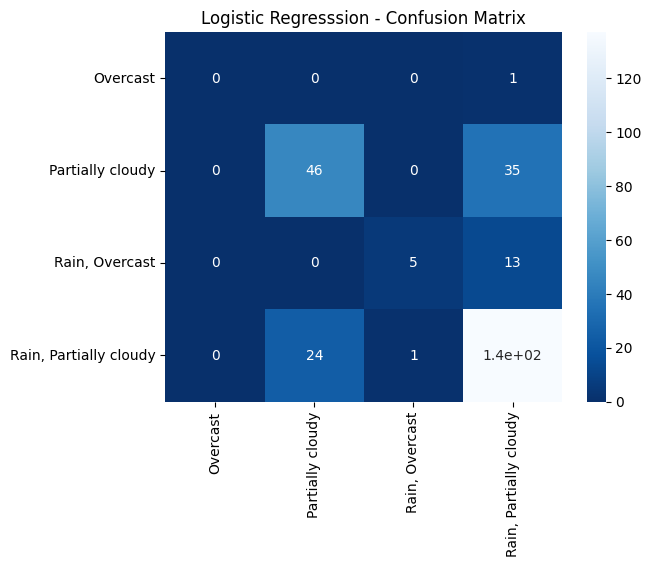

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Object
KNN = KNeighborsClassifier()

# Fit Data
KNN.fit(X_train, y_train)

# Evaluate (Only accuracy) on test set
accuracy = KNN.score(X_test, y_test)
accuracy_t = KNN.score(X_train, y_train)
accuracy_v = KNN.score(X_valid, y_valid)

print(f"Test Acc: {accuracy}\nTrain Acc: {accuracy_t}\nValid Acc: {accuracy_v}")

# Predict Using Model
y_preds = KNN.predict(X_test)

CM = confusion_matrix(y_test, y_preds)
ax = plt.subplot()
ax.set_title("Logistic Regresssion - Confusion Matrix")
sn.heatmap(CM, annot=True, cmap="Blues_r", ax=ax)
ax.xaxis.set_ticklabels(lm)
ax.yaxis.set_ticklabels(lm)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

MLP Classifier

Test Acc: 0.7366412213740458
Train Acc: 0.8074162679425837
Valid Acc: 0.780952380952381


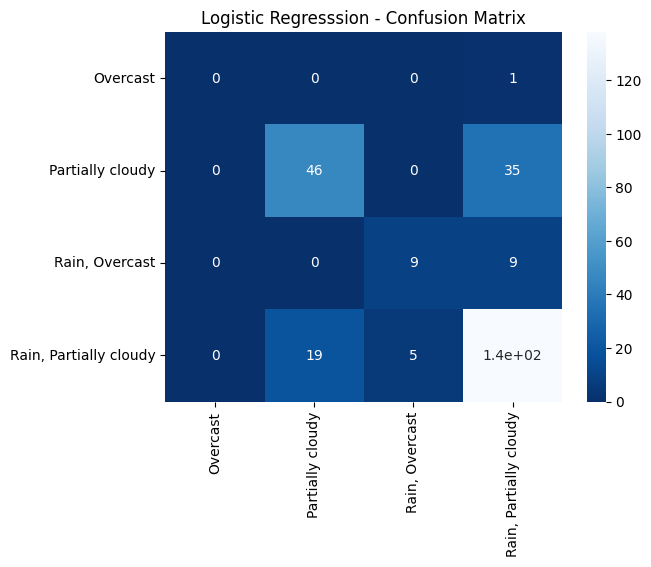

In [99]:
from sklearn.neural_network import MLPClassifier

# MLPC Object
MLPC = MLPClassifier(
    solver = "adam", 
    alpha = 1e-5, 
    hidden_layer_sizes=(300, 300, 300, ), 
    max_iter = 1000,
    activation = 'tanh'
    )

# Fit to data
MLPC.fit(X_train, y_train)

# Evaluate (Only accuracy) on test set
accuracy = MLPC.score(X_test, y_test)
accuracy_t = MLPC.score(X_train, y_train)
accuracy_v = MLPC.score(X_valid, y_valid)

print(f"Test Acc: {accuracy}\nTrain Acc: {accuracy_t}\nValid Acc: {accuracy_v}")

# Predict Using Model
y_preds = MLPC.predict(X_test)

CM = confusion_matrix(y_test, y_preds)
ax = plt.subplot()
ax.set_title("Logistic Regresssion - Confusion Matrix")
sn.heatmap(CM, annot=True, cmap="Blues_r", ax=ax)
ax.xaxis.set_ticklabels(lm)
ax.yaxis.set_ticklabels(lm)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [100]:
MLPC.n_layers_

5